## Plotly

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
# Plotly Styles
px.defaults.height = 576
px.defaults.width = 1024
# To render non interactive charts
import plotly.io as pio
pio.renderers.default = 'png'

#### Line Plots

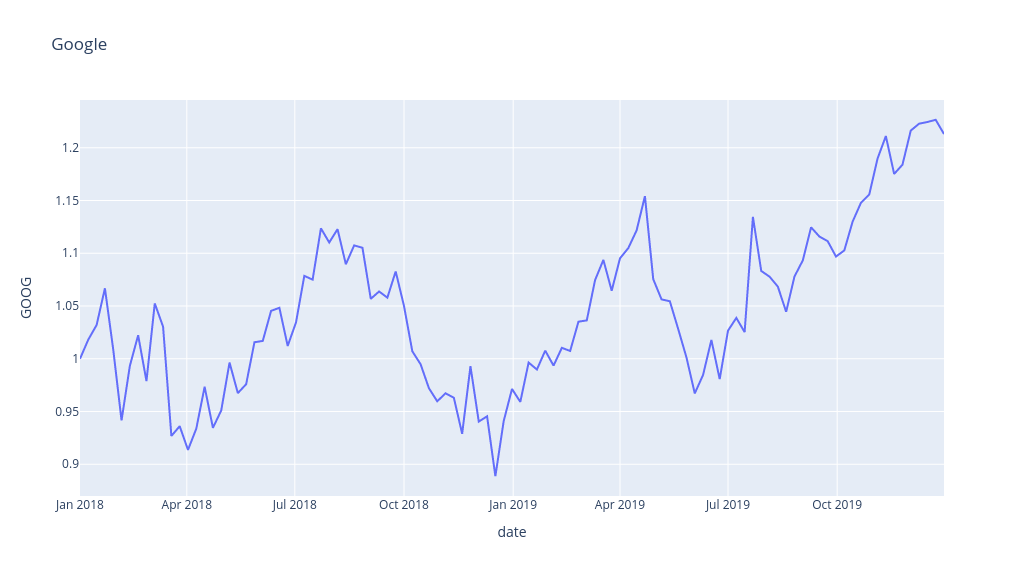

In [3]:
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', title='Google')

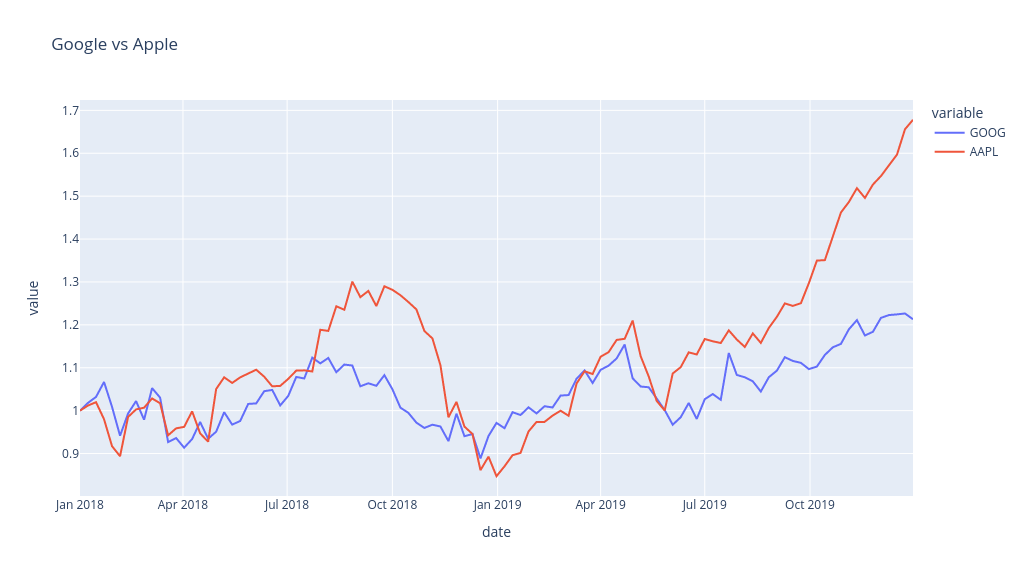

In [4]:
# Multiple data
px.line(df_stocks, x='date', y=['GOOG', 'AAPL'], title='Google vs Apple')